In [73]:
import diplib as dip
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
from skimage.io import imread
from skimage.feature import hog
import matplotlib.pyplot as plt
from utilities import *


In [74]:
parent_dir = "transformed/"
data, data_n = load_dip_images('data/')
embr_orig, orig_names = load_dip_images(parent_dir+'crop_orig_resize/')
embryos_transf, dip_names = load_dip_images(parent_dir+'crop_embr_transf/')
embryos_gray, dip_names = load_dip_images(parent_dir+'crop_embr_gray/')
blue_gray, dip_names = load_dip_images(parent_dir+'blue_gray_crop/')
blue_thresh, dip_names = load_dip_images(parent_dir+'blue_thresh_crop/')

In [75]:
# measurements on cropped embryos
features = ['Perimeter', 'Size',
            'Circularity', 'Roundness',
            'StandardDeviation']
labeled_images, measurements_embr = measure_elements(embryos_transf, embryos_gray, features=features)
areas, perimeters, circularity, roundness, stand_dev = measurements_array(measurements_embr, features)
labeled_images_blue, measurements_blue = measure_elements(blue_thresh, blue_gray, features=features)
areas_blue, perimeters_blue, circularity_blue, roundness_blue, stand_dev_blue = measurements_array(measurements_blue, features)


In [76]:
tot_area_blue = []
tot_perim_blue = []
tot_std_blue = []
tot_round_blue = []
for i in range(len(areas_blue)):
    tot_area_blue.append(np.sum(areas_blue[i]))
    tot_perim_blue.append(np.sum(perimeters_blue[i]))
    tot_std_blue.append(np.sum(stand_dev_blue[i]))
    tot_round_blue.append(np.sum(roundness_blue[i]))

blue_rel_area = np.divide(tot_area_blue,areas)
blue_rel_perim = np.divide(tot_perim_blue,perimeters)
perc_area_blues = blue_rel_area*100
perc_perim_blues = blue_rel_perim*100

In [77]:
d = {'area': areas, 'perimeter': perimeters, 'roundness':roundness, 'circularity':circularity, 
                'area blue': tot_area_blue, 'perimeter blue': tot_perim_blue,
                'percentage area blue': perc_area_blues, 'percentage perim blue': perc_perim_blues, 
                'round blue': tot_round_blue} # 'relative blue area': blue_rel_area, 'relative perim area': blue_rel_perim,
df = pd.DataFrame(data=d)

In [78]:
df = np.round(df,2)
df.head(3)

,area,perimeter,roundness,circularity,area blue,perimeter blue,percentage area blue,percentage perim blue,round blue
0,14687.0,854.54,0.25,0.46,3231.0,274.01,22.00,32.07,0.54
1,16872.0,758.26,0.37,0.35,5604.0,325.70,33.21,42.95,0.68
2,13130.0,747.58,0.30,0.45,3240.0,215.25,24.68,28.79,0.88


In [79]:
perc_area_blues.max(), perc_area_blues.min()

(84.09188361408883, 2.029603050011213)

In [80]:
df['class'] = df['percentage area blue']
df['class'][df['class'] < 20] = 0
df['class'][(df['class'] >= 20) & (df['class'] < 45)] = 1
df['class'][df['class'] >= 45 ] = 2
df.head(3)

,area,perimeter,roundness,circularity,area blue,perimeter blue,percentage area blue,percentage perim blue,round blue,class
0,14687.0,854.54,0.25,0.46,3231.0,274.01,22.00,32.07,0.54,1.0
1,16872.0,758.26,0.37,0.35,5604.0,325.70,33.21,42.95,0.68,1.0
2,13130.0,747.58,0.30,0.45,3240.0,215.25,24.68,28.79,0.88,1.0


In [81]:
df['class'].value_counts()

1.0    28
0.0    22
2.0     8
Name: class, dtype: int64

(array([1., 1., 1., 0., 3., 3., 2., 1., 1., 3., 6., 2., 2., 4., 2., 2., 5.,
        1., 1., 4., 2., 0., 1., 0., 2., 0., 1., 0., 0., 0., 1., 1., 2., 0.,
        0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1.]),
 array([ 2.02960305,  3.67084866,  5.31209427,  6.95333988,  8.5945855 ,
        10.23583111, 11.87707672, 13.51832233, 15.15956794, 16.80081355,
        18.44205916, 20.08330477, 21.72455039, 23.365796  , 25.00704161,
        26.64828722, 28.28953283, 29.93077844, 31.57202405, 33.21326966,
        34.85451528, 36.49576089, 38.1370065 , 39.77825211, 41.41949772,
        43.06074333, 44.70198894, 46.34323455, 47.98448017, 49.62572578,
        51.26697139, 52.908217  , 54.54946261, 56.19070822, 57.83195383,
        59.47319944, 61.11444506, 62.75569067, 64.39693628, 66.03818189,
        67.6794275 , 69.32067311, 70.96191872, 72.60316434, 74.24440995,
        75.88565556, 77.52690117, 79.16814678, 80.80939239, 82.450638  ,
        84.09188361]),
 <BarContainer object

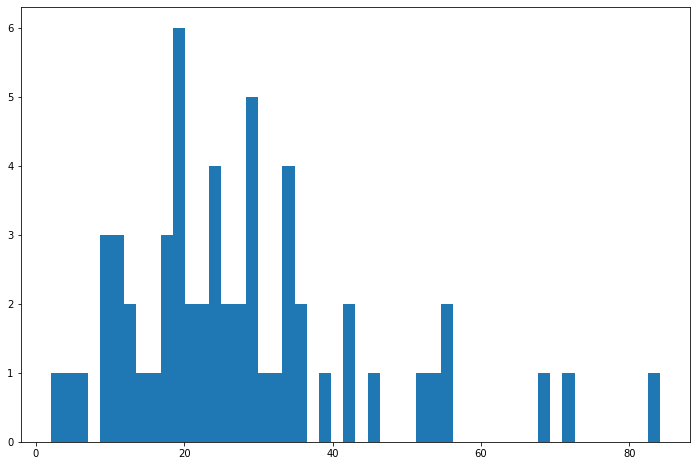

In [82]:
import seaborn as sns
plt.figure(figsize=(12,8))
plt.hist(perc_area_blues,bins=50)

<AxesSubplot:>

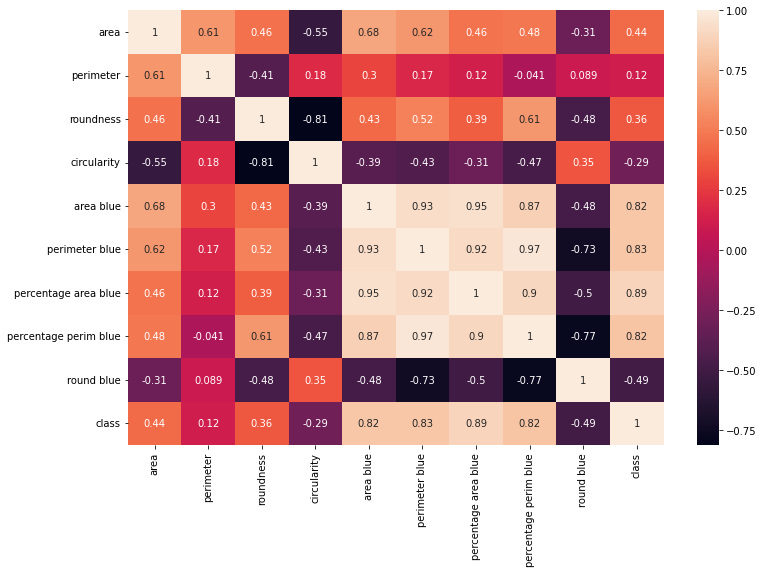

In [83]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True)

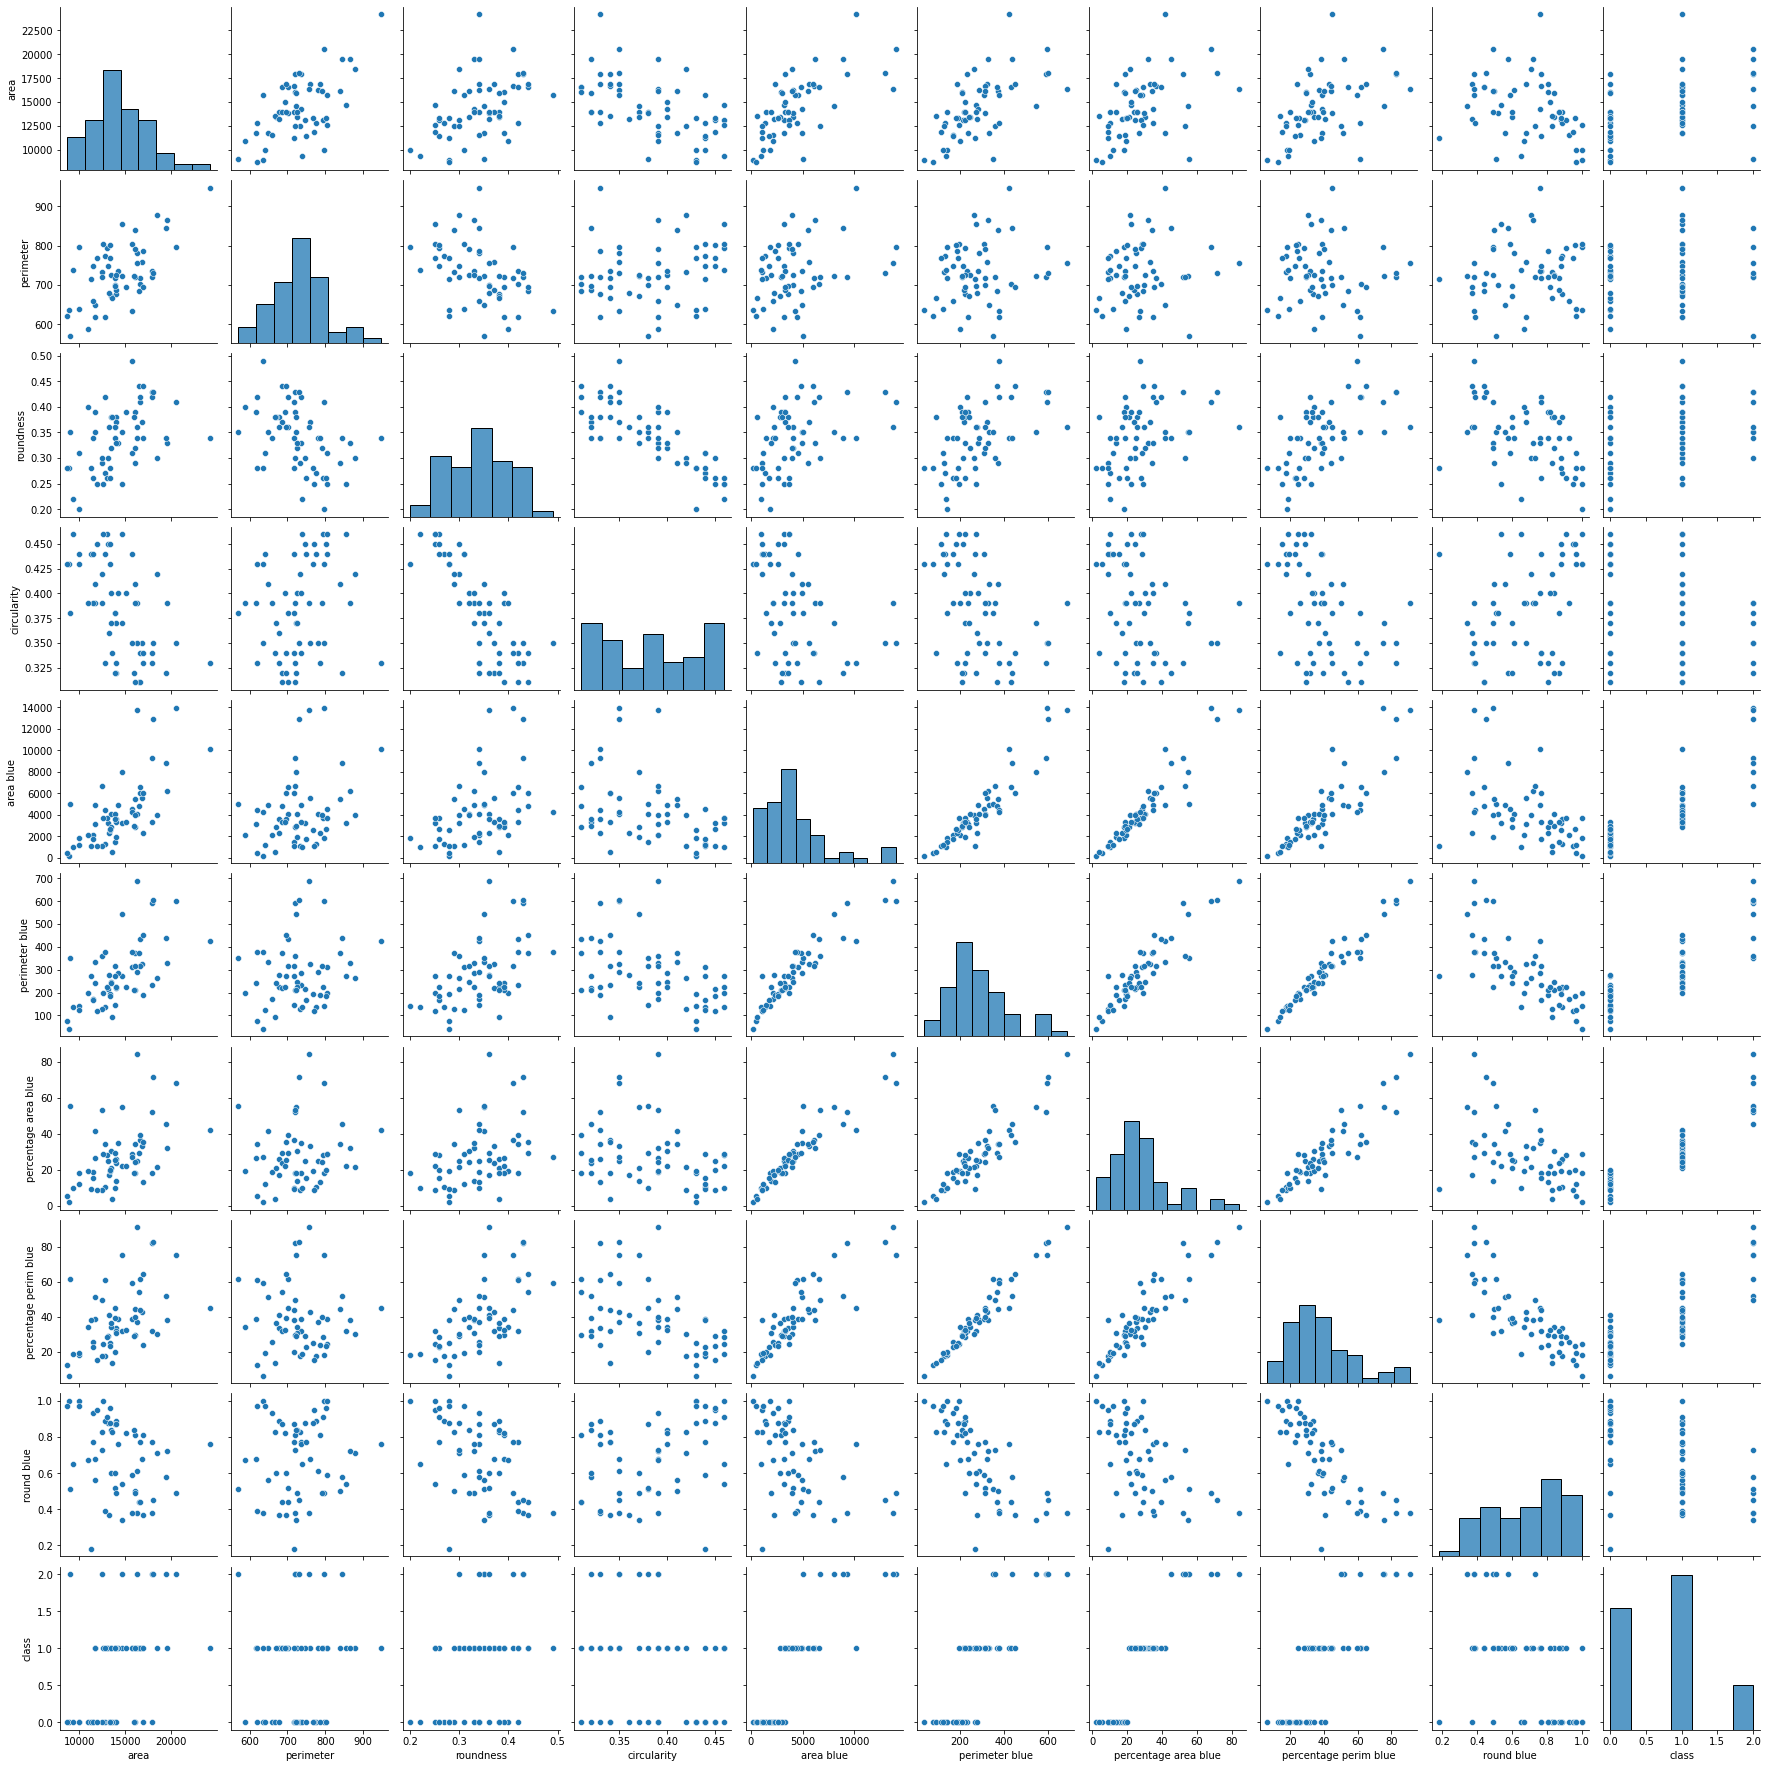

In [84]:
sns.pairplot(df)

In [85]:
unif = [np.unique(x,return_counts=True) for x in embryos_gray]

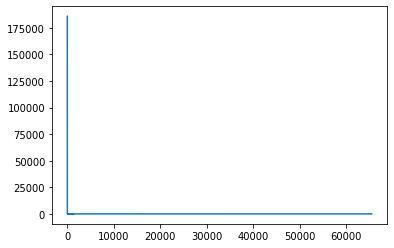

In [69]:
plt.plot(unif[0][0], unif[0][1])


In [70]:
unif_res = [np.sum(counts**2) for elem,counts in unif]

In [71]:
unif_res

[34565188362,
 18370169756,
 19105505060,
 13190407814,
 27042376068,
 23290091254,
 17523236810,
 11545835362,
 42174009732,
 8082610605,
 20957311220,
 42609764370,
 19600733932,
 36796402380,
 31143810954,
 27443941883,
 18691763488,
 26095326,
 78732100,
 65805395,
 24864974,
 5910767,
 95729582,
 28354090220,
 60188766,
 72334390,
 11497318,
 64323464,
 91817747,
 79800021,
 23965431,
 28122931,
 31155018,
 16440249,
 23913695492,
 88458559,
 72834716,
 54427965,
 50869024,
 36999933,
 50735425,
 42210480,
 108857980,
 76005668,
 40413700,
 23009398352,
 35753059,
 37409758,
 15927752,
 23709750,
 54633138,
 30260164,
 303125720,
 30409646,
 13114309154,
 9139471616,
 7221925536,
 31181357938]

In [72]:
parent_dir = "no_norm/"
data, data_n = load_dip_images('data/')
embr_orig, orig_names = load_dip_images(parent_dir+'crop_orig_resize/')
embryos_transf, dip_names = load_dip_images(parent_dir+'crop_embr_transf/')
embryos_gray, dip_names = load_dip_images(parent_dir+'crop_embr_gray/')
blue_gray, dip_names = load_dip_images(parent_dir+'blue_gray_crop/')
blue_thresh, dip_names = load_dip_images(parent_dir+'blue_thresh_crop/')

In [17]:
test = np.array(embr_orig[0])
test_thresh = np.array(embryos_transf[0])

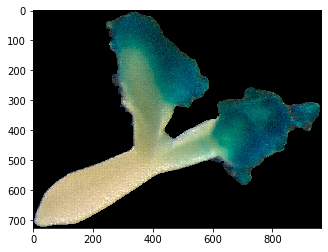

In [18]:
test_thresh_idx = np.where(test_thresh == False)
test[test_thresh_idx[0],
    test_thresh_idx[1]] = 0
dip.Image(test).Show()

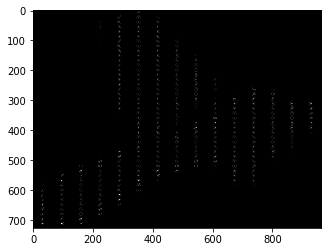

In [19]:
hog = hog_img([dip.Image(test)])
hog[0].Show()

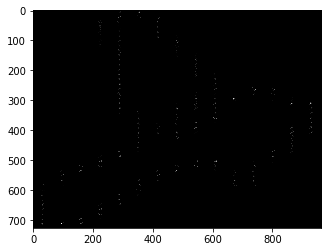

In [49]:
hog = hog_img(embryos_transf, rgb=False)
hog[0].Show()

In [86]:
X = df.drop(columns=['class'])
y = df['class']
from sklearn import svm
from sklearn.model_selection import train_test_split

clf = svm.SVC()
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

clf.fit(X_train,y_train)

SVC()

In [87]:
pred =clf.predict(X_test)

In [88]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

         0.0       1.00      0.33      0.50         6
         1.0       0.44      1.00      0.62         4
         2.0       1.00      0.50      0.67         2

    accuracy                           0.58        12
   macro avg       0.81      0.61      0.59        12
weighted avg       0.81      0.58      0.57        12

